In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imdb = pd.read_csv('../Datasets/imdb_p6_sample.csv')

In [4]:
imdb.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


## Decision tree regressor

In [21]:
y = imdb['rating']
x = imdb.drop(['HA', 'rating', 'tconst', 'title'], axis=1)

In [8]:
imdb['year'].value_counts()

1994    3
1999    2
1995    2
2002    2
1946    1
1957    1
1990    1
1991    1
1993    1
1997    1
1966    1
2001    1
1980    1
2003    1
1972    1
1974    1
1975    1
2008    1
1977    1
2010    1
1954    1
Name: year, dtype: int64

In [9]:
imdb['year'].describe()

count      26.000000
mean     1987.230769
std        17.196064
min      1946.000000
25%      1975.500000
50%      1994.000000
75%      1999.000000
max      2010.000000
Name: year, dtype: float64

In [12]:
cv = KFold(len(imdb), n_folds=3, shuffle=True, random_state=42)   ## setting up a cross-validation scheme

In [15]:
i = 0

for item in cv:
    print i, item
    for x in item[0]:
        if x in item[1]:
            print "We found a match1"
        else:
            print x, "is not in the test set for this fold!"
    i += 1

0 (array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 25]), array([ 0,  1,  8,  9, 11, 13, 16, 23, 24]))
2 is not in the test set for this fold!
3 is not in the test set for this fold!
4 is not in the test set for this fold!
5 is not in the test set for this fold!
6 is not in the test set for this fold!
7 is not in the test set for this fold!
10 is not in the test set for this fold!
12 is not in the test set for this fold!
14 is not in the test set for this fold!
15 is not in the test set for this fold!
17 is not in the test set for this fold!
18 is not in the test set for this fold!
19 is not in the test set for this fold!
20 is not in the test set for this fold!
21 is not in the test set for this fold!
22 is not in the test set for this fold!
25 is not in the test set for this fold!
1 (array([ 0,  1,  6,  7,  8,  9, 10, 11, 13, 14, 16, 18, 19, 20, 23, 24, 25]), array([ 2,  3,  4,  5, 12, 15, 17, 21, 22]))
0 is not in the test set for this fold!
1 is not in the tes

In [22]:
print x.as_matrix

<bound method DataFrame.as_matrix of     year  excellent  great  love  beautiful  best  hope  groundbreaking  \
0   1994          0      1     0          1     0     0               0   
1   1972          1      1     0          0     1     0               1   
2   1974          1      1     0          0     1     0               0   
3   2008          1      1     1          0     1     0               1   
4   1993          1      1     1          1     1     1               1   
5   1957          1      0     0          0     0     0               0   
6   1994          0      0     0          0     0     0               1   
7   2003          1      0     0          1     0     0               0   
8   1966          0      0     0          0     0     1               1   
9   1999          0      1     0          0     0     1               0   
10  2001          1      1     1          1     0     0               0   
11  1980          0      0     1          0     0     0        

In [47]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    decision_tree_regressor = DecisionTreeRegressor()
    decision_tree_regressor.fit(x_train, y_train)
    predictions = decision_tree_regressor.predict(x_test)
    plt.scatter(y_test, predictions)
    plt.plot([8,9,10], [8,9,10])
    plt.xlim((8,10))
    plt.ylim((8,10))
    plt.xlabel("Actual Y Values")
    plt.ylabel("Predicted Y Values")
    plt.show()
    return decision_tree_regressor.score(x_test, y_test)
    

In [25]:
for training_set, test_set in cv:
    print y.as_matrix()[training_set]
    print y.as_matrix()[test_set]
    print '\n'

[ 9.   9.   8.9  8.9  8.9  8.9  8.8  8.8  8.7  8.7  8.7  8.7  8.7  8.7  8.6
  8.6  8.6]
[ 9.3  9.2  8.9  8.9  8.8  8.8  8.7  8.6  8.6]


[ 9.3  9.2  8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.7  8.7  8.7  8.7  8.7  8.6
  8.6  8.6]
[ 9.   9.   8.9  8.9  8.8  8.7  8.7  8.6  8.6]


[ 9.3  9.2  9.   9.   8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.7  8.7  8.7  8.6
  8.6  8.6  8.6]
[ 8.9  8.9  8.8  8.7  8.7  8.7  8.7  8.6]




In [28]:
for training_set, test_set in cv:
    print "These are the indexes that CV has chosen will be the training set: \n"
    print training_set
    print "These are the indexes that CV has chosen will be the test set: \n"
    print test_set
    x_train = x.as_matrix()[training_set]
    x_test = y.as_matrix()[test_set]
    y_train = y.as_matrix()[training_set]
    y_test = y.as_matrix()[test_set]
    print "Here is one fold of data: "
    print x_train, x_test, y_train, y_test
    print '\n'

These are the indexes that CV has chosen will be the training set: 

[ 2  3  4  5  6  7 10 12 14 15 17 18 19 20 21 22 25]
These are the indexes that CV has chosen will be the test set: 

[ 0  1  8  9 11 13 16 23 24]
Here is one fold of data: 
[[1974    1    1    0    0    1    0    0    1]
 [2008    1    1    1    0    1    0    1    1]
 [1993    1    1    1    1    1    1    1    1]
 [1957    1    0    0    0    0    0    0    0]
 [1994    0    0    0    0    0    0    1    0]
 [2003    1    0    0    1    0    0    0    1]
 [2001    1    1    1    1    0    0    0    0]
 [1994    0    0    0    0    0    1    0    0]
 [2002    1    1    0    0    1    1    0    0]
 [1975    0    0    1    1    0    0    0    0]
 [1999    0    0    1    0    0    0    0    1]
 [1954    0    1    0    1    0    0    1    0]
 [1977    1    0    1    0    0    1    0    0]
 [2002    1    0    1    0    0    0    0    0]
 [1995    1    1    0    0    0    1    0    1]
 [1991    0    0    0    0    0    0 

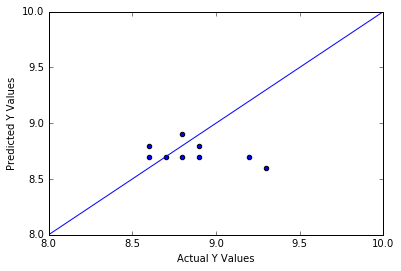

For fold 0 fold of data, the score is: -0.791666666667 


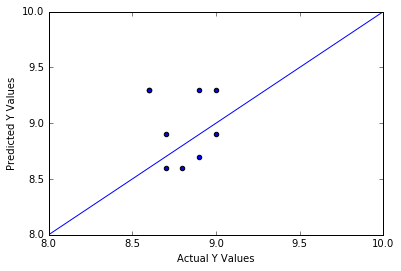

For fold 1 fold of data, the score is: -5.85 


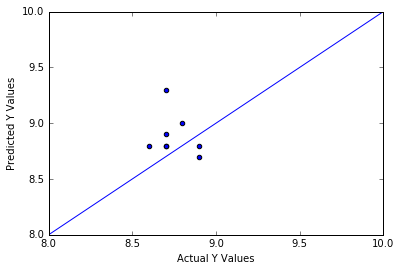

For fold 2 fold of data, the score is: -5.875 
Average model score:  -4.17222222222


In [48]:
counter = 0
scores = []

for training_set, test_set in cv:
    x_train = x.as_matrix()[training_set]
    x_test = x.as_matrix()[test_set]
    y_train = y.as_matrix()[training_set]
    y_test = y.as_matrix()[test_set]
    model_score = fit_and_evaluate_model(x_train, x_test, y_train, y_test)
    print "For fold %s fold of data, the score is: %s " % (counter, model_score)
    scores.append(model_score)
    counter += 1

print "Average model score: ", np.mean(scores)

In [58]:
def fit_and_evaluate_any_model(x_train, x_test, 
                           y_train, y_test,
                          model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    plt.scatter(y_test, predictions)
    plt.plot([8,9,10], [8,9,10])
    plt.xlim((8,10))
    plt.ylim((8,10))
    plt.xlabel("Actual Y Values")
    plt.ylabel("Predicted Y Values")
    plt.show()
    return model.score(x_test, y_test)
    

The model I am testing right now is: decision_tree


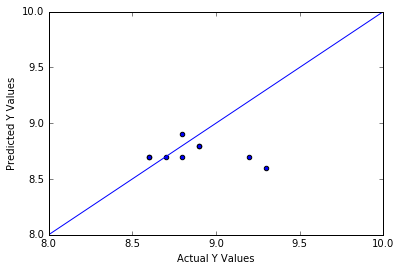

For fold 0 fold of data, the score is: -0.666666666667 


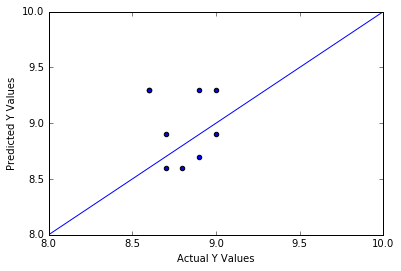

For fold 1 fold of data, the score is: -5.85 


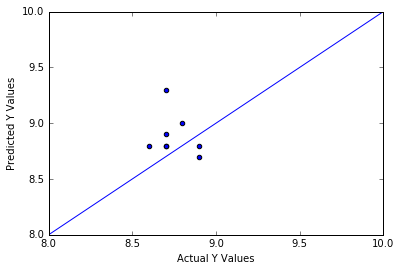

For fold 2 fold of data, the score is: -5.875 
The model I am testing right now is: adaboost


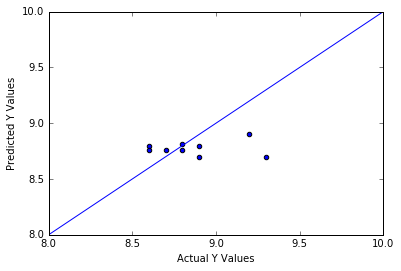

For fold 0 fold of data, the score is: -0.189591836735 


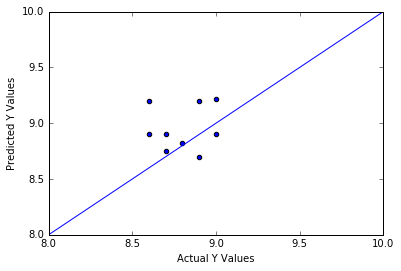

For fold 1 fold of data, the score is: -2.4065 


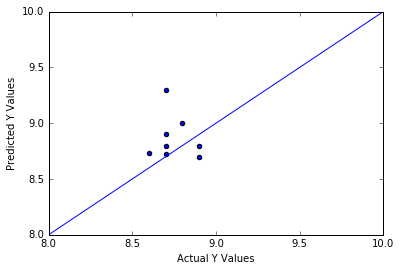

For fold 2 fold of data, the score is: -5.48003472222 
The model I am testing right now is: random_forest


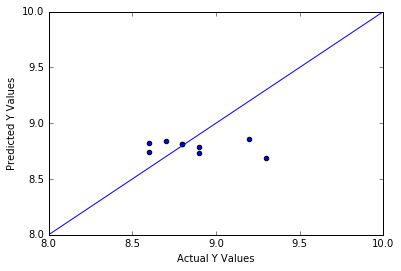

For fold 0 fold of data, the score is: -0.284375 


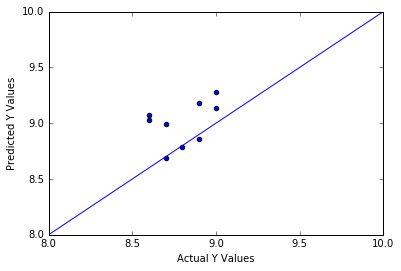

For fold 1 fold of data, the score is: -2.3405 


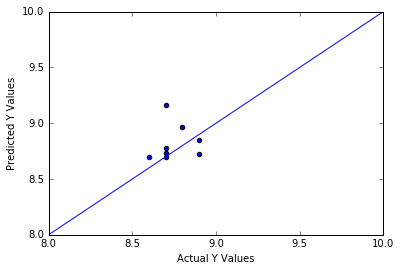

For fold 2 fold of data, the score is: -2.65875 
The model I am testing right now is: gradient_boosting


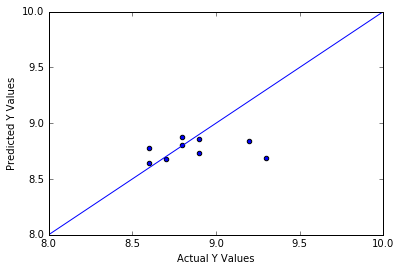

For fold 0 fold of data, the score is: -0.180127521772 


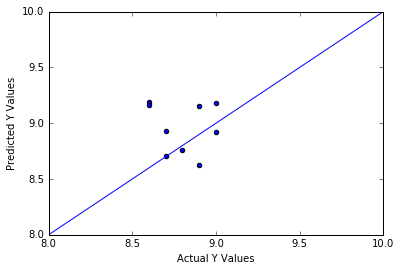

For fold 1 fold of data, the score is: -3.4606736692 


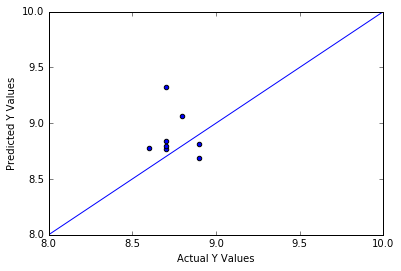

For fold 2 fold of data, the score is: -6.21903203575 
Average model score:  -3.28661107557


In [60]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


models = {
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'adaboost': AdaBoostRegressor(),
    'gradient_boosting': GradientBoostingRegressor()
}

for key, value in models.items():
    print "The model I am testing right now is: %s" % key
    counter = 0
    scores = []
    for training_set, test_set in cv:
        x_train = x.as_matrix()[training_set]
        x_test = x.as_matrix()[test_set]
        y_train = y.as_matrix()[training_set]
        y_test = y.as_matrix()[test_set]
        model_score = fit_and_evaluate_any_model(x_train, x_test, y_train, y_test, value)
        print "For fold %s fold of data, the score is: %s " % (counter, model_score)
        scores.append(model_score)
        counter += 1

print "Average model score: ", np.mean(scores)

# Feature Evaluation

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(cars['acceptability'])
x = pd.get_dummies(cars.drop('acceptability', axis=1))

NameError: name 'cars' is not defined